<a href="https://colab.research.google.com/github/EddyGiusepe/Eddy_Desafio_QI3/blob/main/Eddy_DESAFIO_(QI)3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align='center'>**PROCESSO SELETIVO $(QI)^3$ - DESAFIO $C$**</h2>


## **Cientista de Dados:** Eddy Giusepe Chirinos Isidro

# **Parte 1 do Desafio**


**Contexto e entendimento do problema de negócio**

Neste script apresentarei o desafio de uma grande loja de varejo (a BigStore). Esta loja deseja utilizar os seus dados para realizar análises inteligentes com o objetivo de entender melhor a situação do negócio e alavancar suas vendas. Ela possui uma grande base de dados com informações sobre as vendas dos últimos anos.

**<font color="blue">O nosso problema de negócio:</font>**

Extrair informação dos Dados, de tal maneira que possamos ajudar a esta loja de varejo a **alavancar suas vendas** no menor tempo possível.


**<font color="blue">Dataset:</font>**

* [BigStore](https://drive.google.com/file/d/1bfQEn6_hcDUySCs4swpxdEbSFNY4-M1T/view)



**<font color="blue">Descrição das tabelas nos formato .xlsx:</font>**
  * **``Modos_Envio``**: classe padrão, no mesmo dia, primeira classe ou segunda classe  
  * **``Formas_Pagamento:``**  crédito ou débito
  * **``Regioes:``**  caribe, central, norte ou sul
  * **``Estados:``**  aqui temos $223$ estados de diferentes paises
  * **``Cidades:``** aqui temos $641$ cidades
  * **``Lojas:``**  aqui também temos $641$ lojas distintas
  * **``Segmentos:``**  grande empresa, pequenas e medianas empresas e varejo
  * **``Clientes:``** aqui temos ID_Cliente, nome do cliente, data de cadastro, etc
  * **``Categorias:``** temos $20$ categorias distintas, categoria pai, etc
  * **``Produtos:``** temos $101$ produtos diferentes com seus respectivos nomes 
  * **``Marcas:``** marca do produto
  * **``Paises:``** aqui temos $24$ paises
  * **``Meta_Pais:``** meta anual de cada país  
  * **``Itens:``**  descrição de cada produto
  * **``Pedidos:``** temos o ID do pedido, a loja onde se comprou esse produto, cliente que comprou, data de compra, lucro da venda, valor da venda, etc
  * **``Pedidos_Pagamento:``**  aqui temos a forma de pagamento, ID do pedido, o valor da venda, etc
  * **``Pedidos_Itens:``**  aqui temos a quantidade, desconto, lucro, venda, etc 
  * **``Pedidos_Envios:``**  aqui temos a data de envio, a venda, etc 

\\


Geralmente um projeto está dividido em $5$ etapas, as quais são:


<font color="red">I.</font> Coleta de Dados
  
<font color="red">II.</font> Limpeza e transformação dos Dados 
  
<font color="red">III.</font> Análise e exploração dos Dados
  
<font color="red">IV.</font> Seleção do modelo
  
<font color="red">V.</font> Interpretação e apresentação de resultados


Neste projeto vou desenvolver a etapa <font color='red'>I</font> (coleta de nosso Dados) e depois desenvolverei as etapas <font color='red'>II</font> e <font color='red'>III</font> juntas. 

## <font color="red">I. COLETA DE DADOS</font>

Nesta primeira etapa importo os Dados da loja. Esses Dados estão no formato **.xlsx**. Mas para poder realizar a leitura desses Dados ([BigStore](https://drive.google.com/file/d/1bfQEn6_hcDUySCs4swpxdEbSFNY4-M1T/view)), precisamos em primeiro lugar importar os módulos (chamados também: bibliotecas, livrarias, etc) **mais comuns** que me permitirão desenvolver esta tarefa e as demais que veremos posteriormente. Então, a seguir importamos essas bibliotecas: 

### 1.<font color="blue">Importamos nossas bibliotecas necessárias</font>

In [ ]:
import os # Funcionalidade dependente do sistema operacional
import sys # dir(sys)
import re # Expressões Regulares


import numpy as np # operações numéricas, arrays, algebra linear, etc
import pandas as pd # Manipulação e análise de Dados
import seaborn as sns # Visualização 
import matplotlib.pyplot as plt # Visualização
%matplotlib inline 


from sklearn.preprocessing import StandardScaler # Para escalonar nossos Dados
from sklearn.cluster import KMeans # O algoritmo KMeans

                                                                    
import warnings 
warnings.filterwarnings('ignore')

### 2. Lendo nosso arquivo BigStore.xlsx como um DataFrame


Então, carregamos nossos Dados cru. Para isso utilizamos a biblioteca ``Pandas``.

In [ ]:
df_Modos_Envio = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Modos_Envio", header=0)

df_Formas_Pagamento = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Formas_Pagamento", header=0)

df_Regioes = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Regioes", header=0)

df_Estados = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Estados", header=0)

df_Cidades = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Cidades", header=0)

df_Lojas = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Lojas", header=0)

df_Segmentos = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Segmentos", header=0)

df_Clientes = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Clientes", header=0)

df_Categorias = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Categorias", header=0)

df_Produtos = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Produtos", header=0)

df_Marcas = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Marcas", header=0)

df_Paises = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Paises", header=0)

df_Meta_Pais = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Meta_Pais", header=0)

df_Itens = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Itens", header=0)

df_Pedidos = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Pedidos", header=0)

df_Pedidos_Pagamento = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Pedidos_Pagamento", header=0)

df_Pedidos_Itens = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Pedidos_Itens", header=0)

df_Pedidos_Envios = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",
                          sheet_name="Pedidos_Envios", header=0)



In [ ]:
# Primeira folha do excel

df_Modos_Envio.head()

,ID_Modo_Envio,Modo de envio
0,1,Classe padrão
1,2,No mesmo dia
2,3,Primeira classe
3,4,Segunda classe


In [ ]:
# Exportando para um arquivo excel

df_Modos_Envio.to_excel("Modos_Envio1.xlsx", index=False)

In [ ]:
# Segunda folha do excel

df_Formas_Pagamento

,ID_Forma_Pagamento,Forma_Pagamento
0,1,Crédito
1,2,Débito


In [ ]:
# Exportando para um arquivo excel

df_Formas_Pagamento.to_excel("Formas_Pagamento1.xlsx", index=False)

In [ ]:
# Terceira folha do excel

df_Regioes

,ID_Regiao,Regiao
0,1,Caribe
1,2,Central
2,3,Norte
3,4,Sul


In [ ]:
# Exportando para um arquivo excel

df_Regioes.to_excel("Regioes1.xlsx", index=False)

In [ ]:
# Quarta folha do excel

df_Estados.sample(5)

,ID_Estado,ID_Pais,Estado
83,84,7,Guantânamo
88,89,16,Hidalgo
103,104,21,La Romana
207,208,5,Tarapacá
180,181,21,San Cristóbal


In [ ]:
# Informações úteis

df_Estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID_Estado  223 non-null    int64 
 1   ID_Pais    223 non-null    int64 
 2   Estado     223 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.4+ KB


In [ ]:
# Quinta folha do excel

df_Cidades.sample(5)

,ID_Cidade,ID_Estado,Cidade
312,313,195,San Bernardo
483,484,138,Jiutepec
518,519,201,Culiacán
218,219,176,Boa Vista
405,406,74,Escuintla


In [ ]:
# Informações úteis

df_Cidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID_Cidade  641 non-null    int64 
 1   ID_Estado  641 non-null    int64 
 2   Cidade     641 non-null    object
dtypes: int64(2), object(1)
memory usage: 15.1+ KB


In [ ]:
# Sexta folha do excel

df_Lojas.sample(5)

,ID_Loja,ID_Cidade,Nome_Loja,Data_Inauguracao
633,634,111,Várzea Grande,43446.0
174,175,266,José Bonifácio,42207.0
520,521,217,Ji-Paraná,42985.0
196,197,144,Colombo,42254.0
510,511,37,Cochabamba,42946.0


In [ ]:
# Informação útil sobre esta ava

df_Lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Loja           641 non-null    int64  
 1   ID_Cidade         641 non-null    int64  
 2   Nome_Loja         641 non-null    object 
 3   Data_Inauguracao  641 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 20.2+ KB


In [ ]:
# Sétima folha do excel

df_Segmentos

,ID_Segmento,Segmento
0,1,Grande Empresa
1,2,Pequenas e Medias Empresas
2,3,Varejo


In [ ]:
# Exportando para um arquivo excel

df_Segmentos.to_excel("Segmentos1.xlsx", index=False)

In [ ]:
# Oitava folha do excel

df_Clientes.sample(5)

,ID_Cliente,ID_Segmento,Nome_Cliente,Data_Cadastro
511,512,3,Laura Ferreira,42363.0
128,129,3,Eduardo Cardoso,42123.0
268,269,3,Evelyn Correia,42204.0
77,78,2,Marisa Cunha,42086.0
266,267,3,Vinicius Santos,42201.0


In [ ]:
# Informações úteis 

df_Clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Cliente     794 non-null    int64  
 1   ID_Segmento    794 non-null    int64  
 2   Nome_Cliente   794 non-null    object 
 3   Data_Cadastro  794 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


In [ ]:
# Nona folha de excel

df_Categorias.head(5)

,ID_Categoria,Categoria,ID_Categoria_Pai
0,1,Material de escritório,NaN
1,2,Móveis,NaN
2,3,Tecnologia,NaN
3,4,Armazenamento,1.0
4,5,Arte,1.0


In [ ]:
# Método .info() para ver as informações úteis
# Na seguinte etapa trataremos esta variável

df_Categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Categoria      20 non-null     int64  
 1   Categoria         20 non-null     object 
 2   ID_Categoria_Pai  17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 608.0+ bytes


In [ ]:
# Décima folha do excel

df_Produtos.sample(5)

,ID_Produto,Produto
15,16,Caixa
9,10,Bloco de desenho
64,65,Mesa de conferência
70,71,Moedor de café
67,68,Mesa para computador


In [ ]:
# Informações sobre esta ava

df_Produtos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_Produto  101 non-null    int64 
 1   Produto     101 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [ ]:
# Décima primeira folha do excel

df_Marcas.sample(5)

,ID_Marca,Marca
1,2,Accos
25,26,Eldon
60,61,SAFCO
42,43,KitchenAid
44,45,Konica


In [ ]:
# Observamos as características e informações úteis com o método .info()

df_Marcas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID_Marca  76 non-null     int64 
 1   Marca     76 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [ ]:
# Décima segunda folha do excel

df_Paises.sample(5)

,ID_Pais,ID_Regiao,País
18,19,4,Paraguai
2,3,4,Bolívia
17,18,2,Panamá
12,13,2,Honduras
20,21,1,República Dominicana


In [ ]:
# Observamos as informações úteis

df_Paises.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID_Pais    24 non-null     int64 
 1   ID_Regiao  24 non-null     int64 
 2   País       24 non-null     object
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


In [ ]:
# Décima terceira folha do excel 

df_Meta_Pais.sample(5)

,ID_Pais,País,Meta_Anual
15,16,México,1115000
11,12,Haiti,19000
17,18,Panamá,100000
23,24,Venezuela,78000
0,1,Argentina,70000


In [ ]:
# Informações sobre esta folha 

df_Meta_Pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_Pais     24 non-null     int64 
 1   País        24 non-null     object
 2   Meta_Anual  24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 704.0+ bytes


In [ ]:
# Décima quarta folha do excel 

df_Itens.sample(5)

,ID_Item,ID_Produto,ID_Marca,ID_Categoria,Descricao
1760,1761,56,71,19,Durável
1737,1738,10,70,5,Azul
1313,1314,89,51,20,Tamanho real
424,425,48,17,18,Colorida
174,175,33,7,10,Reciclado


In [ ]:
# Informações sobre este DataFrame

df_Itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1909 entries, 0 to 1908
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Item       1909 non-null   int64 
 1   ID_Produto    1909 non-null   int64 
 2   ID_Marca      1909 non-null   int64 
 3   ID_Categoria  1909 non-null   int64 
 4   Descricao     1909 non-null   object
dtypes: int64(4), object(1)
memory usage: 74.7+ KB


In [ ]:
# Décima quinta folha do excel

df_Pedidos.sample(5)

,ID_Pedido,ID_Loja,ID_Cliente,Data_Compra,Quantidade_Itens,Quantidade_Envios,Lucro,Vendas
4950,4951,6,465,01/12/2018,2,2,-617.2400,6696.9600
1226,1227,124,341,12/06/2016,4,4,591.9672,5308.9672
266,267,40,45,17/06/2015,1,1,-5352.9600,3691.4400
3057,3058,71,342,26/10/2017,2,2,21.2400,1401.8400
2866,2867,56,371,22/09/2017,3,3,341.8000,1519.2000


In [ ]:
# Informações sobre este DataFrame
# Na seguinte etapa trataremos esta variável

df_Pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5147 entries, 0 to 5146
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Pedido          5147 non-null   int64  
 1   ID_Loja            5147 non-null   int64  
 2   ID_Cliente         5147 non-null   int64  
 3   Data_Compra        5145 non-null   object 
 4   Quantidade_Itens   5147 non-null   int64  
 5   Quantidade_Envios  5147 non-null   int64  
 6   Lucro              5146 non-null   float64
 7   Vendas             5146 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 321.8+ KB


In [ ]:
# Décima sexta folha do excel

df_Pedidos_Pagamento.sample(5)

,ID_Pedido_Pagamento,ID_Pedido,ID_Forma_Pagamento,Vendas
7264,7265,3805,2,1890.398495
9364,9365,4921,2,381.543758
7825,7826,4102,1,225.780000
9694,9695,5093,2,2784.215933
4299,4300,2250,1,1005.850000


In [ ]:
# Informações sobre esta ava

df_Pedidos_Pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9794 entries, 0 to 9793
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Pedido_Pagamento  9794 non-null   int64  
 1   ID_Pedido            9794 non-null   int64  
 2   ID_Forma_Pagamento   9794 non-null   int64  
 3   Vendas               9794 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 306.2 KB


In [ ]:
# Décima sétima folha do excel

df_Pedidos_Itens.sample(5)

,ID,ID_Pedido,ID_Item,Quantidade,Desconto,Lucro,Vendas
9256,9257,4623,832,6,0.000,205.2000,734.4000
4264,4265,2172,588,2,0.400,-249.6800,880.3200
497,498,263,1661,7,0.000,1717.8000,6874.0000
9594,9595,4793,651,7,0.500,-2305.1000,2680.3000
9603,9604,4797,1033,4,0.002,1294.1264,6523.7264


In [ ]:
# Informações sobre este DataFrame

df_Pedidos_Itens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10281 entries, 0 to 10280
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10281 non-null  int64  
 1   ID_Pedido   10281 non-null  int64  
 2   ID_Item     10281 non-null  int64  
 3   Quantidade  10281 non-null  int64  
 4   Desconto    10281 non-null  float64
 5   Lucro       10281 non-null  float64
 6   Vendas      10281 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 562.4 KB


In [ ]:
# Décima oitava folha do excel

df_Pedidos_Envios.sample(5)

,ID,ID_Pedido_Item,ID_Modo_Envio,Data_Envio,Vendas
1867,1868,6488,3,43063.000000,2061.6000
9667,9668,9215,1,43394.083333,14828.4836
2220,2221,917,4,42264.000000,775.3200
3267,3268,3788,1,42730.000000,4762.0800
6075,6076,3464,1,42693.000000,2294.4000


In [ ]:
# Usando o método .info() para observar as informações deste DataFrame

df_Pedidos_Envios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10283 entries, 0 to 10282
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10283 non-null  int64  
 1   ID_Pedido_Item  10283 non-null  int64  
 2   ID_Modo_Envio   10283 non-null  int64  
 3   Data_Envio      10283 non-null  float64
 4   Vendas          10283 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 401.8 KB


## II. e III. LIMPEZA, TRANSFORMAÇÃO, ANÁLISE E EXPLORAÇÃO DOS DADOS

Aqui vamos a identificar que Dados estão faltando, remover Dados duplicados, substituir esses valores missing (se for necessário), normalizar (se for necessário) e descubrir se existem possíveis valores que possam alterar a nossa análise ou alguma previsão futura de mercado.

Tratamento para **df_Estados**:

In [ ]:
# Utilizo o método .drop_duplicates(), para eliminar as linhas repetidas

df_Estados = df_Estados.drop_duplicates()

In [ ]:
# Verifico mais uma vez este DataFrame

df_Estados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID_Estado  223 non-null    int64 
 1   ID_Pais    223 non-null    int64 
 2   Estado     223 non-null    object
dtypes: int64(2), object(1)
memory usage: 7.0+ KB


In [ ]:
# Exportando para um arquivo excel

df_Estados.to_excel("Estados1.xlsx", index=False)

Tratamento para **df_Cidades**:

In [ ]:
# Utilizo o método .drop_duplicates()

df_Cidades = df_Cidades.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Cidades.to_excel("Cidades1.xlsx", index=False)

In [ ]:
# Verificando 

df_Cidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID_Cidade  641 non-null    int64 
 1   ID_Estado  641 non-null    int64 
 2   Cidade     641 non-null    object
dtypes: int64(2), object(1)
memory usage: 20.0+ KB


Tratamento para **df_Lojas**:

In [ ]:
# Eliminando linhas repetidas

df_Lojas = df_Lojas.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Lojas.to_excel("Lojas1.xlsx", index=False)

In [ ]:
# Verificando

df_Lojas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 0 to 640
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Loja           641 non-null    int64  
 1   ID_Cidade         641 non-null    int64  
 2   Nome_Loja         641 non-null    object 
 3   Data_Inauguracao  641 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 25.0+ KB


Tratamento para **df_Clientes**:

In [ ]:
# Eliminando linhas repetidas

df_Clientes = df_Clientes.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Clientes.to_excel("Clientes1.xlsx", index=False)

In [ ]:
df_Clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794 entries, 0 to 793
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_Cliente     794 non-null    int64  
 1   ID_Segmento    794 non-null    int64  
 2   Nome_Cliente   794 non-null    object 
 3   Data_Cadastro  794 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.0+ KB


Tratamento para **df_Categorias**:

In [ ]:
# Neste DataFrame observamos que faltam três valores. Então, vamos a substituir por um valor razoável a cada categoria

df_Categorias.head(5)

,ID_Categoria,Categoria,ID_Categoria_Pai
0,1,Material de escritório,NaN
1,2,Móveis,NaN
2,3,Tecnologia,NaN
3,4,Armazenamento,1.0
4,5,Arte,1.0


In [ ]:
# Substituímos os três primeiros valores, assim:

#df_Categorias['ID_Categoria_Pai'].fillna(2, inplace=True)
df_Categorias['ID_Categoria_Pai'][df_Categorias['ID_Categoria']==1]=1
df_Categorias['ID_Categoria_Pai'][df_Categorias['ID_Categoria']==2]=2
df_Categorias['ID_Categoria_Pai'][df_Categorias['ID_Categoria']==3]=3

df_Categorias.head()

,ID_Categoria,Categoria,ID_Categoria_Pai
0,1,Material de escritório,1.0
1,2,Móveis,2.0
2,3,Tecnologia,3.0
3,4,Armazenamento,1.0
4,5,Arte,1.0


In [ ]:
# Aplico o método .drop_duplicates(), por acaso

df_Categorias = df_Categorias.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Categorias.to_excel("Categorias1.xlsx", index=False)

In [ ]:
df_Categorias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Categoria      20 non-null     int64  
 1   Categoria         20 non-null     object 
 2   ID_Categoria_Pai  20 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 640.0+ bytes


Tratamento para **df_Produtos**:

In [ ]:
# Eliminamos as linhas que se repetem

df_Produtos = df_Produtos.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Produtos.to_excel("Produtos1.xlsx", index=False)

In [ ]:
df_Produtos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_Produto  101 non-null    int64 
 1   Produto     101 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Tratamento para **df_Marcas**:

In [ ]:
df_Marcas = df_Marcas.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Marcas.to_excel("Marcas1.xlsx", index=False)

In [ ]:
df_Marcas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID_Marca  76 non-null     int64 
 1   Marca     76 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


Tratamento para **df_Paises**:

In [ ]:
df_Paises = df_Paises.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Paises.to_excel("Paises1.xlsx", index=False)

In [ ]:
df_Paises.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID_Pais    24 non-null     int64 
 1   ID_Regiao  24 non-null     int64 
 2   País       24 non-null     object
dtypes: int64(2), object(1)
memory usage: 768.0+ bytes


Tratamento para **df_Meta_Pais**:

In [ ]:
df_Meta_Pais = df_Meta_Pais.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Meta_Pais.to_excel("Meta_Pais1.xlsx", index=False)

In [ ]:
df_Meta_Pais.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID_Pais     24 non-null     int64 
 1   País        24 non-null     object
 2   Meta_Anual  24 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 768.0+ bytes


Tratamento para **df_Itens**:

In [ ]:
df_Itens = df_Itens.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Itens.to_excel("Itens1.xlsx", index=False)

In [ ]:
df_Itens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1909 entries, 0 to 1908
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID_Item       1909 non-null   int64 
 1   ID_Produto    1909 non-null   int64 
 2   ID_Marca      1909 non-null   int64 
 3   ID_Categoria  1909 non-null   int64 
 4   Descricao     1909 non-null   object
dtypes: int64(4), object(1)
memory usage: 89.5+ KB


Tratamento para **df_Pedidos**:

In [ ]:
# Neste DataFrame termos cuidado de simplesmente eliminar as linhas repetidas ou linhas sem Dados

df_Pedidos.head(50)

,ID_Pedido,ID_Loja,ID_Cliente,Data_Compra,Quantidade_Itens,Quantidade_Envios,Lucro,Vendas
0,1,1,1,03/01/2015,1,1,448.8000,1952.0000
1,2,3,5,04/01/2015,2,2,6380.0000,17974.0000
2,3,6,4,04/01/2015,2,2,627.0824,3881.0824
3,4,4,3,04/01/2015,1,1,36.0000,1857.6000
4,5,5,2,04/01/2015,2,2,91.2000,761.0000
5,6,2,3,04/01/2015,1,1,-1078.5600,743.0400
6,7,7,6,05/01/2015,1,1,9993.6000,30288.0000
7,8,8,7,07/01/2015,2,2,84.0000,615.8000
8,9,9,8,08/01/2015,2,2,2028.2000,4466.0000
9,10,10,10,10/01/2015,2,2,586.4000,1299.2000


In [ ]:
# Aplicamos o método .isnull() e o método .sum(), para poder contabilizar os Dados faltantes

df_Pedidos.isnull().sum()

ID_Pedido            0
ID_Loja              0
ID_Cliente           0
Data_Compra          2
Quantidade_Itens     0
Quantidade_Envios    0
Lucro                1
Vendas               1
dtype: int64

In [ ]:
# Vou vizualizar onde estão o 4 valores faltantes, especificamente na coluna "Data_Compra"

df_Pedidos.loc[df_Pedidos['Data_Compra'].isnull(), :]

,ID_Pedido,ID_Loja,ID_Cliente,Data_Compra,Quantidade_Itens,Quantidade_Envios,Lucro,Vendas
38,39,35,36,NaN,1,1,NaN,NaN
48,49,32,46,NaN,1,1,-1217.92,1074.48


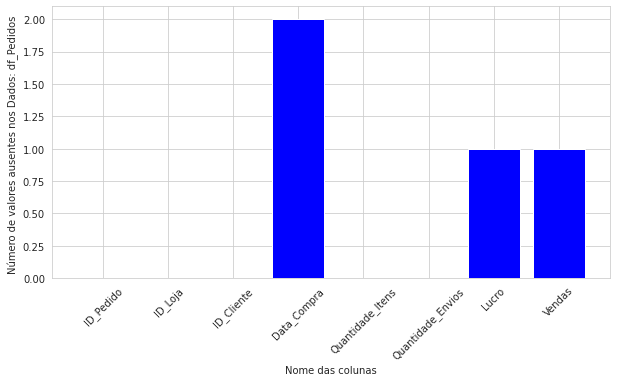

In [ ]:
# Podemos visualizar nossos Dados faltantes num gráfico de barras

plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
plt.bar(df_Pedidos.columns, df_Pedidos.isna().sum(), color='blue')
plt.xlabel("Nome das colunas")
plt.ylabel("Número de valores ausentes nos Dados: df_Pedidos ")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Primeiro preenchemos a "Data_Compra"
# Tinha pensado usar: df.fillna(method='ffill') --> propagar valores no nulos hacia adelante o hacia atrás

df_Pedidos['Data_Compra'][df_Pedidos['ID_Pedido']==39]='09/02/2015'
df_Pedidos['Data_Compra'][df_Pedidos['ID_Pedido']==49]='24/02/2015'

In [ ]:
# Seguidamente vamos a eliminar a linha onde falta tanto o valor de LUCRO e o valor de VENDA (ambas na mesma linha)

# O método abaixo remove todas as linhas que contém um Dado faltante:
df_Pedidos.dropna(inplace=True)


In [ ]:
# Verificamos novamente nossos Dados

df_Pedidos.isnull().sum()

ID_Pedido            0
ID_Loja              0
ID_Cliente           0
Data_Compra          0
Quantidade_Itens     0
Quantidade_Envios    0
Lucro                0
Vendas               0
dtype: int64

In [ ]:
df_Pedidos = df_Pedidos.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Pedidos.to_excel("Pedidos1.xlsx", index=False)

In [ ]:
df_Pedidos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5144 entries, 0 to 5144
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Pedido          5144 non-null   int64  
 1   ID_Loja            5144 non-null   int64  
 2   ID_Cliente         5144 non-null   int64  
 3   Data_Compra        5144 non-null   object 
 4   Quantidade_Itens   5144 non-null   int64  
 5   Quantidade_Envios  5144 non-null   int64  
 6   Lucro              5144 non-null   float64
 7   Vendas             5144 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 361.7+ KB


Tratamento para **df_Pedidos_Pagamento**:

In [ ]:
df_Pedidos_Pagamento = df_Pedidos_Pagamento.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Pedidos_Pagamento.to_excel("Pedidos_Pagamento1.xlsx", index=False)

In [ ]:
df_Pedidos_Pagamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9794 entries, 0 to 9793
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Pedido_Pagamento  9794 non-null   int64  
 1   ID_Pedido            9794 non-null   int64  
 2   ID_Forma_Pagamento   9794 non-null   int64  
 3   Vendas               9794 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 382.6 KB


Tratamento para **df_Pedidos_Itens**:

In [ ]:
df_Pedidos_Itens = df_Pedidos_Itens.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Pedidos_Itens.to_excel("Pedidos_Itens1.xlsx", index=False)

In [ ]:
df_Pedidos_Itens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10281 entries, 0 to 10280
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10281 non-null  int64  
 1   ID_Pedido   10281 non-null  int64  
 2   ID_Item     10281 non-null  int64  
 3   Quantidade  10281 non-null  int64  
 4   Desconto    10281 non-null  float64
 5   Lucro       10281 non-null  float64
 6   Vendas      10281 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 642.6 KB


Tratamento para **df_Pedidos_Envios**:

In [ ]:
df_Pedidos_Envios = df_Pedidos_Envios.drop_duplicates()

In [ ]:
# Exportando para um arquivo excel

df_Pedidos_Envios.to_excel("Pedidos_Envios1.xlsx", index=False)

In [ ]:
df_Pedidos_Envios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10283 entries, 0 to 10282
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              10283 non-null  int64  
 1   ID_Pedido_Item  10283 non-null  int64  
 2   ID_Modo_Envio   10283 non-null  int64  
 3   Data_Envio      10283 non-null  float64
 4   Vendas          10283 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 482.0 KB


# Parte 3 do Desafio

A. CARREGAMOS NOSSOS DADOS TRATADOS (LIMPOS)

In [ ]:
#df = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/BigStore_Sujo.xlsx",sheet_name='Pedidos')

df = pd.read_excel("/content/drive/MyDrive/DESAFIO_(QI)3/Pedidos1.xlsx")

In [ ]:
# Quantidade de entradas depopis de tratar nossos Dados
# Chamei a meu arquivo de --> "Pedidos1"

len(df)

5144

In [ ]:
df.sample(5)

,ID_Pedido,ID_Loja,ID_Cliente,Data_Compra,Quantidade_Itens,Quantidade_Envios,Lucro,Vendas
4383,4385,456,117,16/09/2018,3,3,2661.064,8673.264
2840,2842,300,66,20/09/2017,2,2,3503.400,9839.200
4675,4677,46,730,28/10/2018,7,7,779.400,4802.000
205,207,127,174,02/06/2015,1,1,232.400,3894.800
432,434,13,3,08/09/2015,1,1,36.000,516.000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Pedido          5144 non-null   int64  
 1   ID_Loja            5144 non-null   int64  
 2   ID_Cliente         5144 non-null   int64  
 3   Data_Compra        5144 non-null   object 
 4   Quantidade_Itens   5144 non-null   int64  
 5   Quantidade_Envios  5144 non-null   int64  
 6   Lucro              5144 non-null   float64
 7   Vendas             5144 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 321.6+ KB


In [ ]:
df.isnull().sum()

ID_Pedido            0
ID_Loja              0
ID_Cliente           0
Data_Compra          0
Quantidade_Itens     0
Quantidade_Envios    0
Lucro                0
Vendas               0
dtype: int64

B. GERANDO A MINHA TABELA DE FREQUÊNCIA POR VENDAS

In [ ]:
# Criando a tabela
df_fm = df.groupby('ID_Cliente').agg({'ID_Pedido': 'count', 'Vendas': 'sum'}).reset_index()

# Renomeamos as colunas
df_fm.rename(columns={'ID_Pedido': 'qtd_total_compras', 'Vendas': 'valor_total_gasto (R$)'}, inplace=True)

In [ ]:
df_fm.head()

,ID_Cliente,qtd_total_compras,valor_total_gasto (R$)
0,1,5,14083.2000
1,2,5,16730.9756
2,3,8,24423.3400
3,4,7,20161.5944
4,5,8,78031.5232


In [ ]:
# Verificando a contagem, "qtd_total_compras", da tabela anterior (para o cliente com "ID_Cliente = 1"):

df.loc[df['ID_Cliente']==1, :]

,ID_Pedido,ID_Loja,ID_Cliente,Data_Compra,Quantidade_Itens,Quantidade_Envios,Lucro,Vendas
0,1,1,1,03/01/2015,1,1,448.8,1952.0
802,804,60,1,14/12/2015,1,1,520.8,1063.2
2058,2060,456,1,15/02/2017,2,2,1185.8,3928.6
2935,2937,36,1,03/10/2017,1,1,692.0,1731.0
4997,4999,108,1,09/12/2018,3,3,748.2,5408.4


In [ ]:
# Verificando a contagem, "qtd_total_compras", da tabela anterior (para o cliente com "ID_Cliente = 5"):

df.loc[df['ID_Cliente']==5, :]

,ID_Pedido,ID_Loja,ID_Cliente,Data_Compra,Quantidade_Itens,Quantidade_Envios,Lucro,Vendas
1,2,3,5,04/01/2015,2,2,6380.0000,17974.0000
412,414,191,5,30/08/2015,1,1,172.0832,1954.4832
688,690,267,5,15/11/2015,1,1,2000.4000,10002.6000
1721,1723,21,5,03/11/2016,3,3,-106.9200,10967.6800
3662,3664,65,5,01/04/2018,2,2,239.0800,3431.2800
4115,4117,32,5,11/07/2018,3,3,121.4800,2301.2800
4657,4659,620,5,25/10/2018,1,1,491.2000,24609.6000
4979,4981,118,5,04/12/2018,6,6,2180.2000,6790.6000


In [ ]:
df_fm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Cliente              794 non-null    int64  
 1   qtd_total_compras       794 non-null    int64  
 2   valor_total_gasto (R$)  794 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 18.7 KB


C. FAZEMOS UM ESCALONAMENTO DE NOSSOS DADOS

Melhor dito, vamos a ``escalar`` as colunas "qtd_total_compras" e	"valor_total_gasto (R$)".

In [ ]:
# Já foi exportado a biblioteca acima --> from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/stable/modules/preprocessing.html

scaler = StandardScaler()
X = df_fm.iloc[:, [1,2]]
X = scaler.fit_transform(X)

In [ ]:
print(X)

[[-0.56508358 -0.73592491]
 [-0.56508358 -0.58802085]
 [ 0.58144886 -0.15832735]
 ...
 [-2.09379351 -1.48968288]
 [-1.71161602 -1.33978375]
 [-2.09379351 -1.47116202]]


In [ ]:
# Média zero
X.mean(axis=0)


array([-1.07386811e-16, -1.61080217e-16])

In [ ]:
# Desvio padrão igual a um
X.std(axis=0)

array([1., 1.])

D. CLUSTERIZAÇÃO (sinônimos: AGRUPAMENTO, SEGMENTAÇÃO)

A seguir vamos a calcular o número ideal de cluster utilizando o [Elbow Method](https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9).

\\

**NOTA:**

O ``KMeans`` calcula a distância das observações até o centro do agrupamento que ela pertence, o ideal é que essa distância seja a menor viável. Matematicamente falando, nós estamos buscando uma quantidade de agrupamentos em que a soma dos quadrados intra-clusters (ou do inglês within-clusters sum-of-squares, comumente abreviado para ``wcss``) seja a menor possível, sendo zero o resultado ótimo.

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [ ]:
print(wcss)

[1587.9999999999998, 782.8077850673453, 549.8736896536063, 434.30555444050754, 342.053770141351, 293.31967820130325, 252.70598757557337, 228.20450764695929, 203.7841623395428, 184.9865357942225]


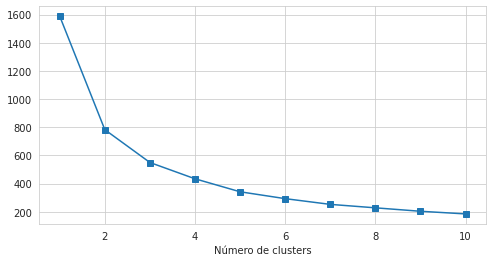

In [ ]:
# Plotamos um gráfico para identificar o melhor "n_clusters"

plt.figure(figsize=(8,4))
plt.plot(range(1, 11), wcss, marker='s')
plt.xlabel('Número de clusters')
plt.show()

A partir do gráfico podemos considerar $5$ grupos de clientes. Agrupando os dados em X temos:

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)
previsoes = kmeans.fit_predict(X)

In [ ]:
print(previsoes)

[3 3 2 3 1 1 3 0 2 2 2 3 1 2 2 2 1 0 0 2 0 3 0 1 2 1 0 3 1 2 0 1 2 2 4 1 3
 3 3 2 0 3 0 2 0 2 3 4 0 0 1 3 0 3 0 4 2 0 3 0 3 4 2 3 3 4 2 1 2 3 2 2 3 1
 2 1 3 4 0 3 0 1 3 0 0 3 3 3 1 3 2 4 2 0 3 3 0 2 0 3 2 4 4 4 4 0 2 3 3 3 1
 4 3 3 1 1 1 2 3 0 2 2 4 1 1 3 3 3 1 0 2 4 4 1 3 3 0 0 1 2 3 3 2 4 2 2 3 3
 3 4 0 2 3 1 4 0 1 2 0 2 3 3 3 0 2 0 0 3 2 2 2 3 3 3 0 3 0 4 4 1 4 2 1 2 4
 4 0 2 3 4 0 1 3 2 3 2 2 1 2 4 3 3 2 2 2 3 0 2 1 3 2 3 2 3 3 3 2 2 1 4 0 4
 1 2 3 2 1 2 0 1 4 0 2 3 3 4 3 3 3 2 2 3 3 2 3 3 0 3 4 2 2 2 2 4 4 0 2 3 2
 2 1 0 3 2 0 1 1 2 3 0 3 2 1 4 0 1 3 2 2 2 3 0 0 4 3 4 2 3 0 4 4 3 0 3 2 3
 0 2 3 0 3 3 1 2 3 4 0 4 4 4 4 3 2 0 2 0 4 3 2 2 2 1 3 3 3 3 2 2 0 0 0 0 4
 0 4 3 0 2 3 4 3 0 0 4 2 4 0 4 2 3 4 3 4 0 3 2 2 2 3 2 3 2 0 4 4 4 0 3 3 4
 1 3 4 1 3 3 2 1 3 3 2 4 3 2 2 4 4 2 1 2 1 2 3 2 2 3 2 3 3 3 3 4 2 0 0 4 3
 3 4 1 2 3 4 1 4 0 4 1 1 1 1 0 2 3 2 2 4 0 0 4 3 2 3 2 3 1 3 3 3 0 3 4 0 4
 1 4 3 4 3 3 3 3 2 3 4 0 3 2 4 3 0 3 3 3 1 3 0 4 3 1 3 4 4 4 3 2 0 0 3 2 3
 0 2 3 2 0 2 3 4 4 3 3 2 

In [ ]:
df_fm['grupos'] = previsoes

In [ ]:
df_fm.head(10)

,ID_Cliente,qtd_total_compras,valor_total_gasto (R$),grupos
0,1,5,14083.2000,3
1,2,5,16730.9756,3
2,3,8,24423.3400,2
3,4,7,20161.5944,3
4,5,8,78031.5232,1
5,6,12,63875.2800,1
6,7,6,10226.1680,3
7,8,6,49024.2952,0
8,9,8,18726.8976,2
9,10,9,25734.0740,2


E. PLOTAMOS OS GRUPOS

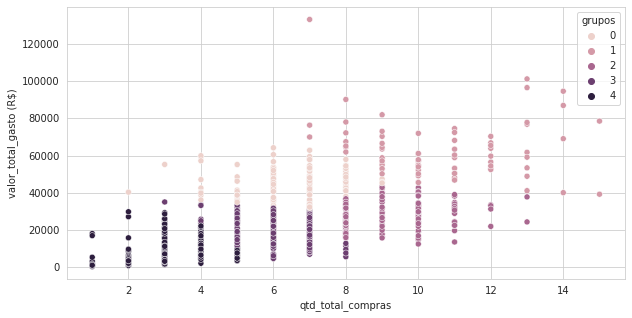

In [ ]:
# Utilizamos novamente a biblioteca seaborn

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_fm, x='qtd_total_compras', y='valor_total_gasto (R$)', hue='grupos')
plt.show()